In [1]:
import ROOT

Welcome to JupyROOT 6.22/02


In [2]:
response = ROOT.RooUnfoldResponse (40, -10.0, 10.0)

In [3]:
def smear(xt):
  xeff = 0.3 + (1.0-0.3)/20*(xt+10.0)  #  efficiency
  x = ROOT.gRandom.Rndm()
  if x>xeff: return None
  xsmear = ROOT.gRandom.Gaus(-2.5,0.2)     #  bias and smear
  return xt + xsmear

In [4]:
f0 = ROOT.TH1F("f0","f0",40,-10,10)
g0 = ROOT.TH1F("g0","g0",40,-10,10)

In [6]:
for i in range(100000):
  xt = ROOT.gRandom.BreitWigner(0.3, 2.5)
  f0.Fill(xt)
  x = smear(xt)
  if x!=None:
    response.Fill(x, xt)
    g0.Fill(x)
  else:
    response.Miss(xt)

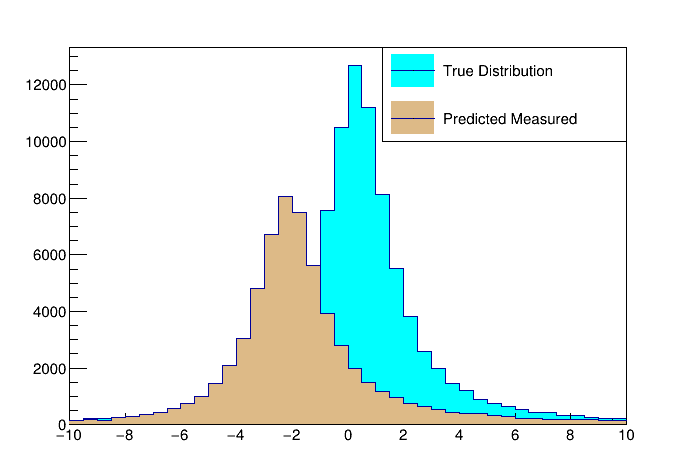

In [7]:
c = ROOT.TCanvas()
f0.SetStats(0)
f0.SetTitle("")
f0.SetFillColor(7)
f0.Draw()
g0.SetFillColor(42)
g0.Draw("same")
leg = ROOT.TLegend(.55,0.7,.9,.9)
leg.AddEntry(f0,"True Distribution")
leg.AddEntry(g0,"Predicted Measured")
leg.Draw()
c.Draw()
#c.SaveAs("true-response.png")

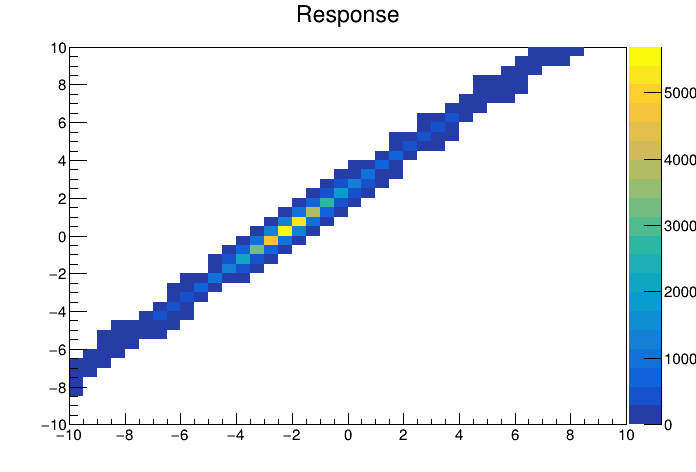

In [8]:
R = response.HresponseNoOverflow()
c1 = ROOT.TCanvas()
R.SetStats(0)
R.Draw("colz")
c1.Draw()
#c1.SaveAs('response.png')

In [10]:
hTrue = ROOT.TH1D ("true", "Test Truth",    40, -10.0, 10.0)
hMeas = ROOT.TH1D ("meas", "Test Measured", 40, -10.0, 10.0)
#  Test with a Gaussian, mean 0 and width 2.
for i in range(10000):
    xt = ROOT.gRandom.Gaus (0.0, 2.0)
    x = smear (xt)
    hTrue.Fill(xt)
    if x != None: hMeas.Fill(x)

Warning in <TROOT::Append>: Replacing existing TH1: true (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: meas (Potential memory leak).


In [11]:
unfold = ROOT.RooUnfoldInvert(response, hMeas)
hReco = unfold.Hreco()

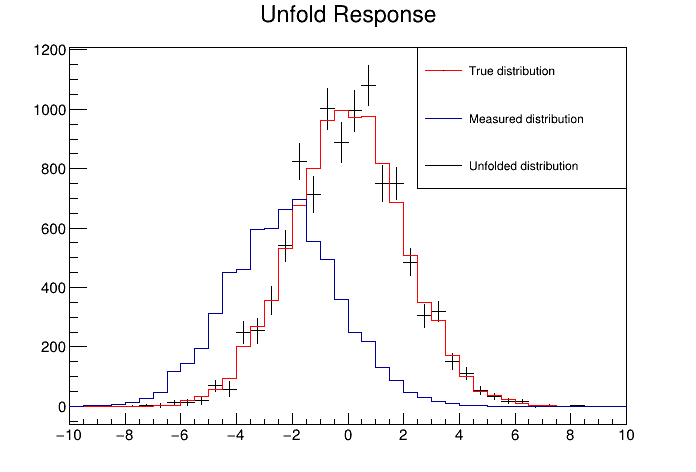

In [17]:
c1 = ROOT.TCanvas()
hReco.SetStats(0)
hTrue.SetLineColor(2)
hReco.SetLineColor(1)
hReco.Draw()
hTrue.Draw("same")
hMeas.Draw("same")
leg = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
leg.AddEntry(hTrue, "True distribution","pl")
leg.AddEntry(hMeas, "Measured distribution", "l")
leg.AddEntry(hReco, "Unfolded distribution")
leg.Draw()
c1.Draw()

In [19]:
double_response = ROOT.RooUnfoldResponse (40, -10.0, 10.0)
f1 = ROOT.TH1F("f1","f1",40,-10,10)
g1 = ROOT.TH1F("g1","g1",40,-10,10)
for i in range(5000):
  xt = ROOT.gRandom.Gaus(2, 1.5)
  f1.Fill(xt)
  x = ROOT.gRandom.Gaus(xt,1.)
  if x!=None:
    double_response.Fill(x, xt)
    g1.Fill(x)
  else:
    double_response.Miss(xt)
for i in range(5000):
  xt = ROOT.gRandom.Gaus(-2, 1.5)
  f1.Fill(xt)
  x = ROOT.gRandom.Gaus(xt,1.)
  if x!=None:
    double_response.Fill(x, xt)
    g1.Fill(x)
  else:
    double_response.Miss(xt)

Warning in <TROOT::Append>: Replacing existing TH1: f1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: g1 (Potential memory leak).


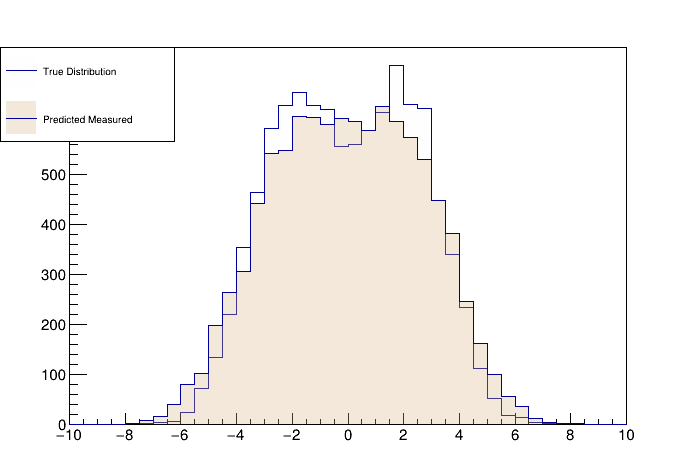

In [29]:
c = ROOT.TCanvas()
f1.SetStats(0)
f1.SetTitle("")
#f1.GetYaxis().SetRangeUser(0,900)
f1.SetFillColorAlpha(7, 0)
f1.Draw()
#g1.SetFillColor(42)
g1.SetFillColorAlpha(42, 0.3)
g1.Draw("same")

leg = ROOT.TLegend(0,0.7,.25,.9)
leg.AddEntry(f1,"True Distribution")
leg.AddEntry(g1,"Predicted Measured")
leg.Draw()
c.Draw()
#c.SaveAs("double-peak-response.png")

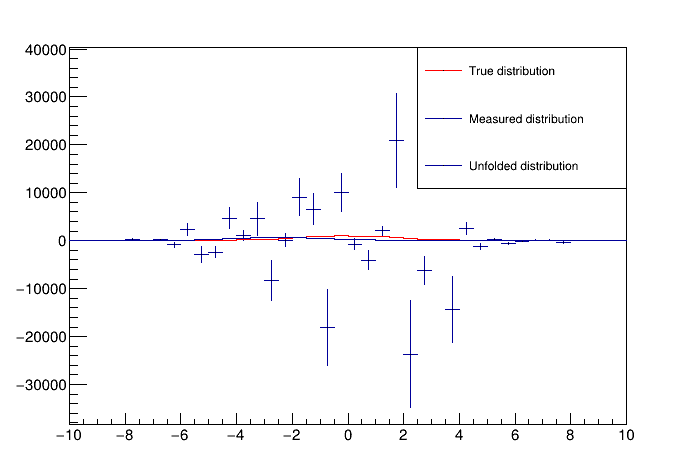

In [30]:
unfold = ROOT.RooUnfoldInvert(double_response, hMeas)
hReco = unfold.Hreco()
c1 = ROOT.TCanvas()
hReco.SetStats(0)
hReco.SetTitle("")
hTrue.SetLineColor(2)
hReco.Draw()
hTrue.Draw("same")
hMeas.Draw("same")
leg = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
leg.AddEntry(hTrue, "True distribution","pl")
leg.AddEntry(hMeas, "Measured distribution", "pl")
leg.AddEntry(hMeas, "Unfolded distribution")
leg.Draw()
c1.Draw()

In [33]:
unfold = ROOT.RooUnfoldSvd(double_response, hMeas)
hReco = unfold.Hreco()

SVD init 40 x 40 bins, kreg=20


Info in <TSVDUnfold_130729::Unfold>: Unfolding param: 20
Info in <TSVDUnfold_130729::Unfold>: Curvature of weight distribution: 167.908582


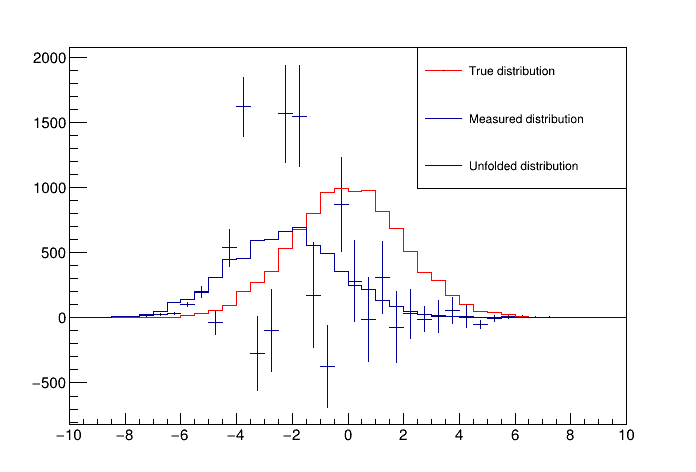

In [34]:

c1 = ROOT.TCanvas()
hReco.SetStats(0)
hReco.SetTitle("")
hTrue.SetLineColor(2)
hReco.Draw()
hTrue.Draw("same")
hMeas.Draw("same")
leg = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
leg.AddEntry(hTrue, "True distribution","pl")
leg.AddEntry(hMeas, "Measured distribution", "pl")
leg.AddEntry(hMeas, "Unfolded distribution")
leg.Draw()
c1.Draw()

